In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb
from tensorflow.keras.preprocessing.image import load_img

ModuleNotFoundError: No module named 'sklearn'

Data augmentation 

In [3]:
img_height=256
img_width=256
batch_size=32
datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'datasets/real_combined_last_dataset/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'datasets/real_combined_last_dataset/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'datasets/real_combined_last_dataset/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 6070 images belonging to 2 classes.
Found 759 images belonging to 2 classes.
Found 760 images belonging to 2 classes.


In [4]:
# Initialising the CNN 
classifier = Sequential()
# Adding Convolution layer
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))

# Adding MaxPooling layers
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the images
classifier.add(Flatten())

classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(BatchNormalization()),
classifier.add(Dense(256,activation='relu')),
classifier.add(Dropout(0.25)),
classifier.add(Dense(units = 2, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
     

In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 512)               6

In [8]:
model_info = classifier.fit(
    train_ds,
    steps_per_epoch = int(round(6070/32)), 
    epochs = 5,
    validation_data = val_ds,
    validation_steps = int(round(759/32)) 
)

Epoch 1/5
190/190 [==============================] - 746s 4s/step - loss: 0.5567 - accuracy: 0.7792 - val_loss: 0.8785 - val_accuracy: 0.7391
Epoch 2/5
190/190 [==============================] - 496s 3s/step - loss: 0.3520 - accuracy: 0.8440 - val_loss: 1.0991 - val_accuracy: 0.7510
Epoch 3/5
190/190 [==============================] - 536s 3s/step - loss: 0.2897 - accuracy: 0.8692 - val_loss: 0.6959 - val_accuracy: 0.7747
Epoch 4/5
190/190 [==============================] - 508s 3s/step - loss: 0.2706 - accuracy: 0.8759 - val_loss: 2.1499 - val_accuracy: 0.7391
Epoch 5/5
190/190 [==============================] - 543s 3s/step - loss: 0.2558 - accuracy: 0.9079 - val_loss: 1.1419 - val_accuracy: 0.7510


In [6]:
classifier.save('datasets/combine_cnn.h5')

E:\study material\miniproject-2\miniproject\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


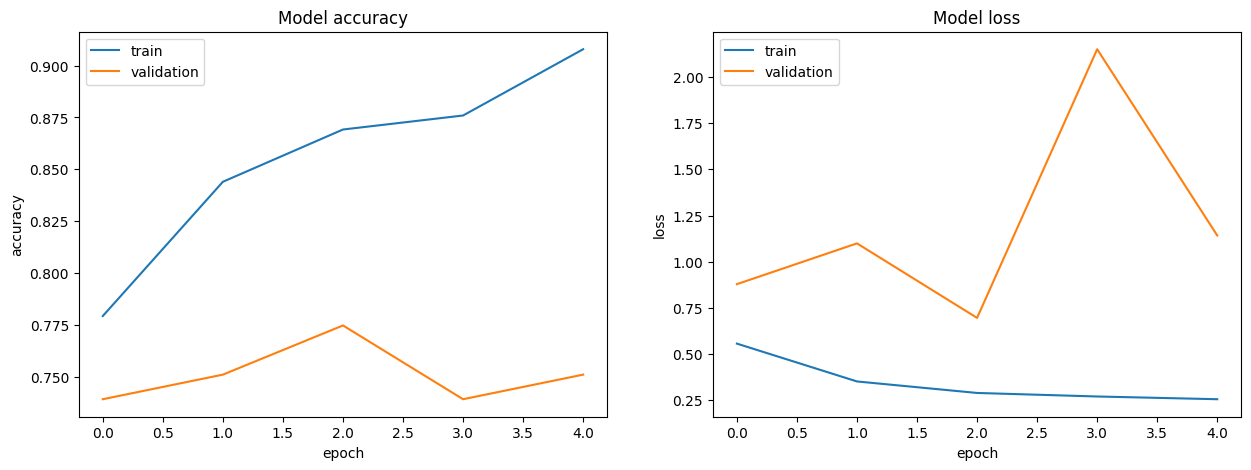

In [9]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(model_info)
     

In [11]:
model=load_model('datasets/combine_cnn.h5')
print("Glaucoma detection model loaded")

NameError: name 'load_model' is not defined

In [12]:
def glaucoma_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  result = np.argmax(model.predict(image))
  return result

In [13]:
test_image = load_img("E:/study material/miniproject-2/real_combined_last_dataset/test/glaucoma/19.png", target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

FileNotFoundError: [Errno 2] No such file or directory: 'E:/study material/miniproject-2/real_combined_last_dataset/test/glaucoma/19.png'

In [14]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

NameError: name 'model' is not defined

In [15]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

24/24 [==============================] - 32s 1s/step
[[567 178]
 [  3  12]]


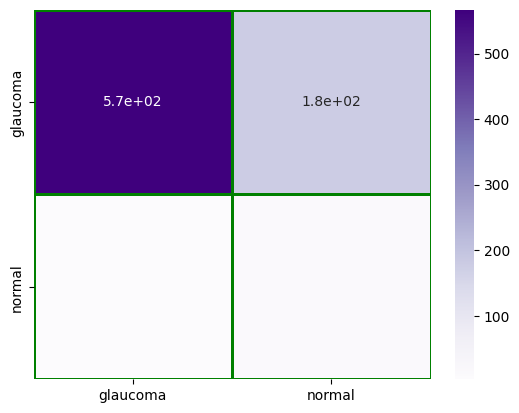

In [16]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [17]:

test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
glaucoma,0.761074,0.994737,0.862357,570.000000
normal,0.800000,0.063158,0.117073,190.000000
accuracy,0.761842,0.761842,0.761842,0.761842
macro avg,0.780537,0.528947,0.489715,760.000000
weighted avg,0.770805,0.761842,0.676036,760.000000
